<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Exercise_Set_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of Variables

Perform following data visualization with the Banknote Authentication data set. 

Note that you want to use the target variable class as hue for the function sns.pairplot().

* Scatter Plots
* Histograms

#### Imports

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### Load data and inspect the first rows

In [4]:
df = pd.read_csv ('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### Show summary statistics

In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.size

6860

In [7]:
# A little bit more color on the 'class' variable to see its values.
#This is the variable indicating whether a bill is authentic or not.
df['class'].unique()

array([0, 1])

#### Plot both scatter Plots and histohram with "pairplot"

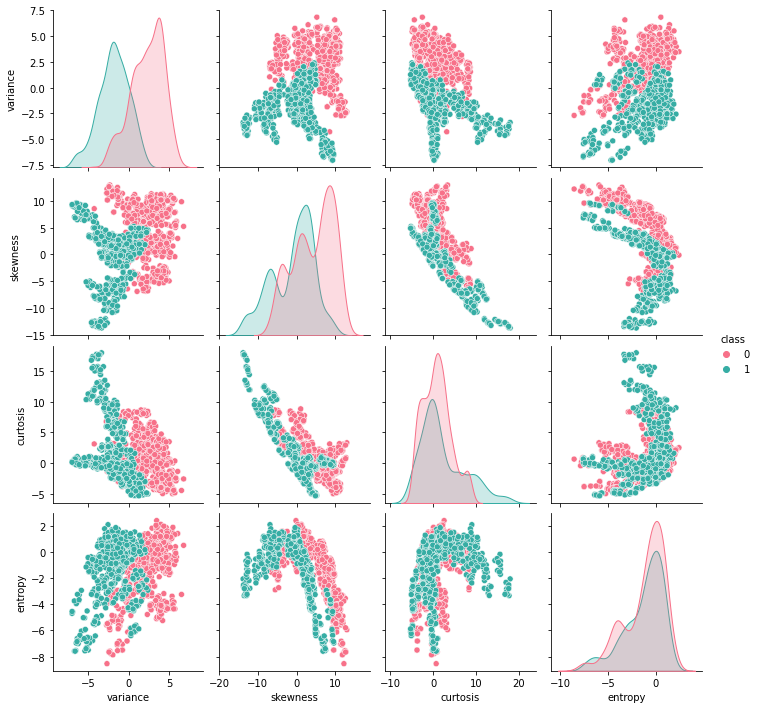

In [8]:
sns.pairplot(df, hue="class", palette="husl")

#### Comment on plots
On the plots above we can see that the 'variance' and 'skewness' have a distribution closer to a Gaussian, while the variables: 'curtosis' and 'entropy' are more skewed. 

Note: In seaborn, the hue parameter denotes which column decides the kind of color.

#### Outliers

There are typically 2 simple ways to check for outliers:

1. From the Density historgram, look at values above 2 or 3 standard deviations from the mean

2. From the Boxplot, check the values on the whiskers, which are values laying on the higher quantiles.

#### Outliers with the Density Histogram method

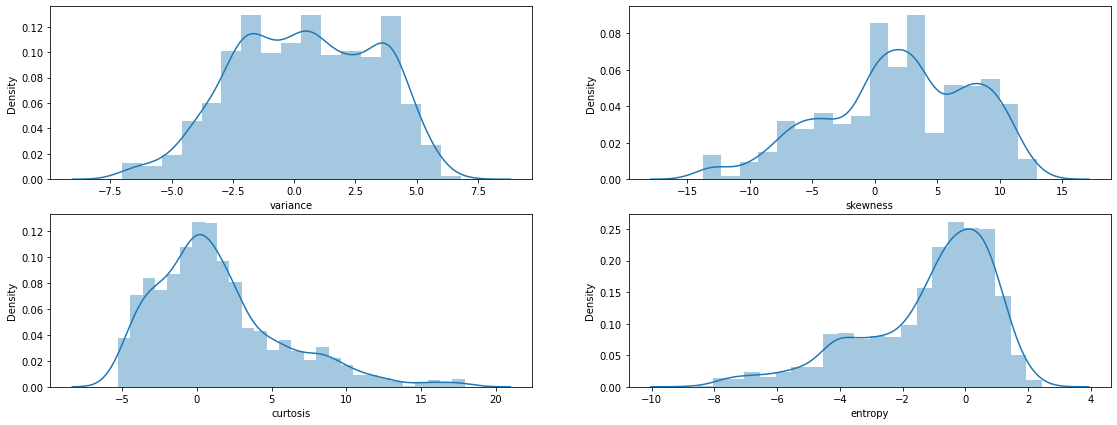

In [19]:
#Create a figure with subplots and add on top of them

import warnings
warnings.filterwarnings('ignore') #less verbose



plt.figure(figsize=(19,7))

plt.subplot(2,2,1)
sns.distplot(df['variance'])

plt.subplot(2,2,2)
sns.distplot(df['skewness'])

plt.subplot(2,2,3)
sns.distplot(df['curtosis'])

plt.subplot(2,2,4)
sns.distplot(df['entropy'])

plt.show()

Let's check the outliers for 'curtosis'

In [10]:
print("Highest allowed",df['curtosis'].mean() + 3*df['curtosis'].std())
print("Lowest allowed",df['curtosis'].mean() - 3*df['curtosis'].std())

Highest allowed 14.327717387586551
Lowest allowed -11.53246315305302


In [11]:
# Find outliers within the 'curtosis' column
df[(df['curtosis'] > 14.3) | (df['curtosis'] < -11.5)]

,variance,skewness,curtosis,entropy,class
765,-3.8483,-12.8047,15.6824,-1.28100,1
820,-4.0025,-13.4979,17.6772,-3.32020,1
826,-4.2110,-12.4736,14.9704,-1.38840,1
881,-4.4861,-13.2889,17.3087,-3.21940,1
887,-3.2692,-12.7406,15.5573,-0.14182,1
942,-3.3793,-13.7731,17.9274,-2.03230,1
948,-3.4917,-12.1736,14.3689,-0.61639,1
1003,-3.8203,-13.0551,16.9583,-2.30520,1
1009,-3.5713,-12.4922,14.8881,-0.47027,1
1064,-3.6961,-13.6779,17.5795,-2.61810,1


#### Identification of outliers with Boxplots

Text(0.5, 1.0, 'Distribution of curtosis')

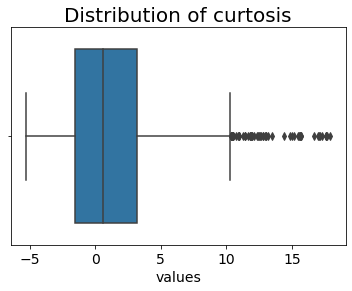

In [12]:
# box plot of the variable curtosis
ax = sns.boxplot(df['curtosis'])


# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('values', fontsize=14)
plt.title('Distribution of curtosis', fontsize=20)

We see positive outliers for this variable

Text(0.5, 1.0, 'Distribution of variance')

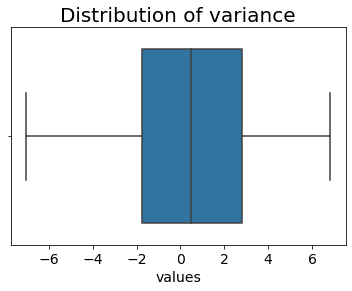

In [13]:
# box plot of the variable variance
ax = sns.boxplot(df['variance'])


# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('values', fontsize=14)
plt.title('Distribution of variance', fontsize=20)

Text(0.5, 0, 'values')

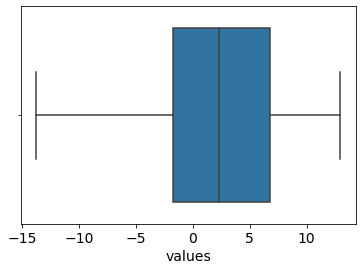

In [14]:
# box plot of the variable skewness
ax = sns.boxplot(df['skewness'])


# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('values', fontsize=14)

Text(0.5, 0, 'values')

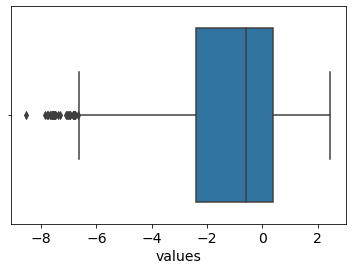

In [15]:
# box plot of the variable entropy
ax = sns.boxplot(df['entropy'])


# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('values', fontsize=14)

We see negative outliers for this variable

### Hexbin Plot and Scatter Plots

Both hexbin and Scatter plots are ways to represent bivariate relationships among two variables.

In particular, when we have a large amount of data, the hexplot is useful. A hexplot splits the plotting window into several hexbins and then the number of observations which fall into each bin corresponds with a color to indicate density. A darker color hexbin means that there are more observations, or more density, within that region. 

The observation frequency bar graphs can be seen along the spines as an additional reference for information. 

Text(45.125, 0.5, 'skewness')

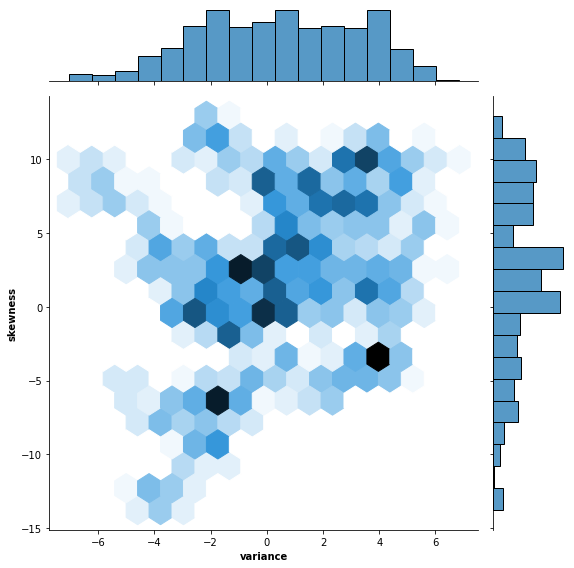

In [22]:
# Variance vs Skewness
h = sns.jointplot(data = df, x=df['variance'], y= df['skewness'], kind = 'hex', height = 8)
h.ax_joint.set_xlabel('Variance', fontweight = 'bold')
h.ax_joint.set_ylabel('Skewness',fontweight = 'bold' )

Text(45.125, 0.5, 'Kurtosis')

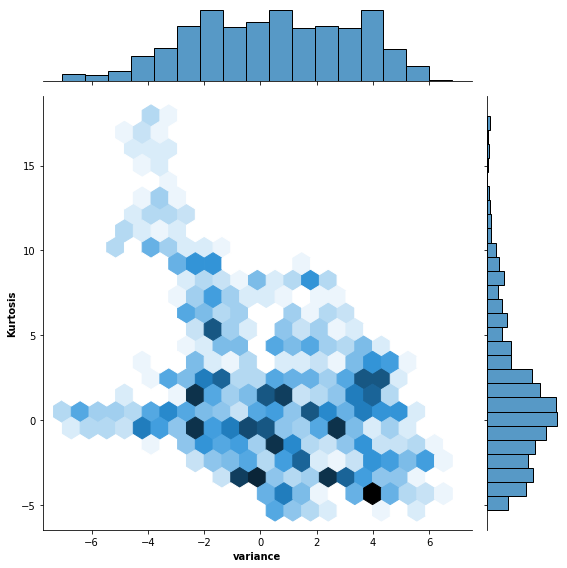

In [23]:
# Variance vs Kurtosis
h = sns.jointplot(data = df, x=df['variance'], y= df['curtosis'], kind = 'hex', height = 8)
h.ax_joint.set_xlabel('variance', fontweight = 'bold')
h.ax_joint.set_ylabel('Kurtosis',fontweight = 'bold' )